## 로지스틱 회귀

In [63]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish.head()
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [67]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [68]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() # 넘파이 형태로 변환하기

In [69]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [70]:
fish_target = fish['Species'].to_numpy()

In [71]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [72]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42 # 데이터를 훈련 세트와 테스트 세트로 나눔
)

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
ss = StandardScaler() # 훈련 세트와 테스트 세트의 특성을 표준화 전처리
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [75]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [76]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 훈련

In [77]:
lr=LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [78]:
print(lr.predict(train_bream_smelt[:5])) # 5개 샘플 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [79]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [80]:
print(lr.classes_)

['Bream' 'Smelt']


In [81]:
lr = LogisticRegression(C=20, max_iter=1000) # C는 로지스틱 회귀에서 규제를 제어하는 매개변수, C가 작을수록 규제가 커짐
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [82]:
print(lr.predict(test_scaled[:5])) 

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [83]:
proba = lr.predict_proba(test_scaled[:5]) # predict_proba() 메서트로 클래스별 확률값을 반환

print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [84]:
decision = lr.decision_function(test_scaled[:5])

print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [85]:
from scipy.special import softmax

proba = softmax(decision, axis=0)
print(np.round(proba, decimals=3))

[[0.003 0.247 0.262 0.    0.239 0.001 0.116]
 [0.    0.603 0.177 0.    0.167 0.995 0.003]
 [0.025 0.    0.036 0.998 0.09  0.004 0.005]
 [0.969 0.138 0.021 0.    0.222 0.    0.769]
 [0.003 0.012 0.504 0.001 0.282 0.    0.108]]


In [86]:
from sklearn.linear_model import SGDClassifier

In [87]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) #loss를 log_loss로 지정하여 로지스틱 손실 함수를 지정함, max_iter은 수행 할 에포크 횟수
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [88]:
sc.partial_fit(train_scaled, train_target) # 점진적 학습

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [89]:
sc = SGDClassifier(loss='log_loss', random_state=42) 

train_score = []
test_score = []

classes = np.unique(train_target)

In [90]:
for _ in range(0, 300): #300번의 반복 동안 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 리스트에 추가
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

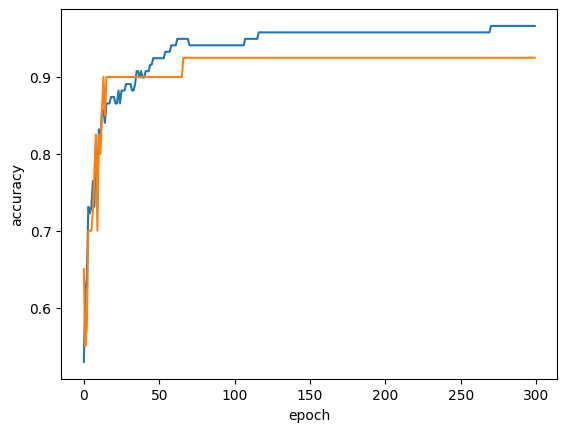

In [91]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show() 

48정도가 최적의 epoch 값임!

### 결정트리 

In [92]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [93]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [94]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [95]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [96]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42) #20% 정도만 테스트 세트로 나눔

In [97]:
ss = StandardScaler() # 스케일링
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

0.996921300750433
0.8592307692307692


In [100]:
from sklearn.tree import plot_tree

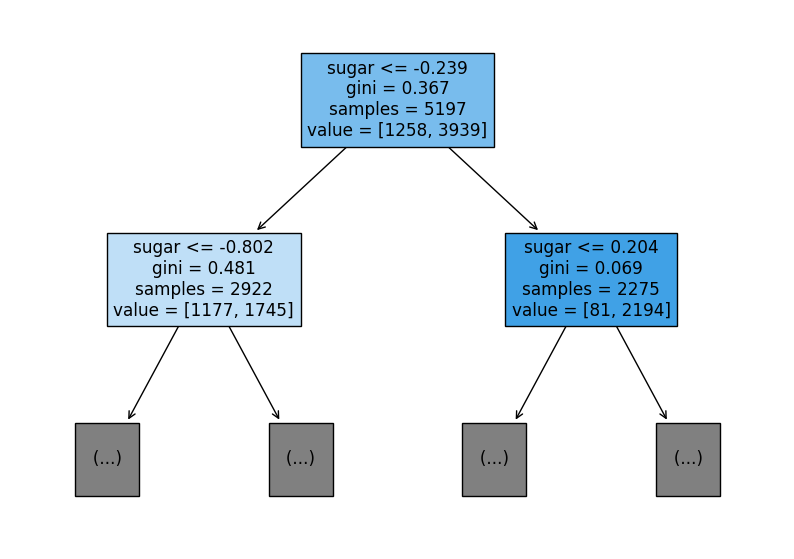

In [101]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) 
plt.show()

# max_depth를 1로 설정하여 루트노드를 제외하고 하나의 노드를 더 확장하여 그림

In [102]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) #이번엔 may_depth를 3으로 설정
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


훈련 세트의 성능은 낮아졌지만 테스트 성능은 거의 그대로임!!

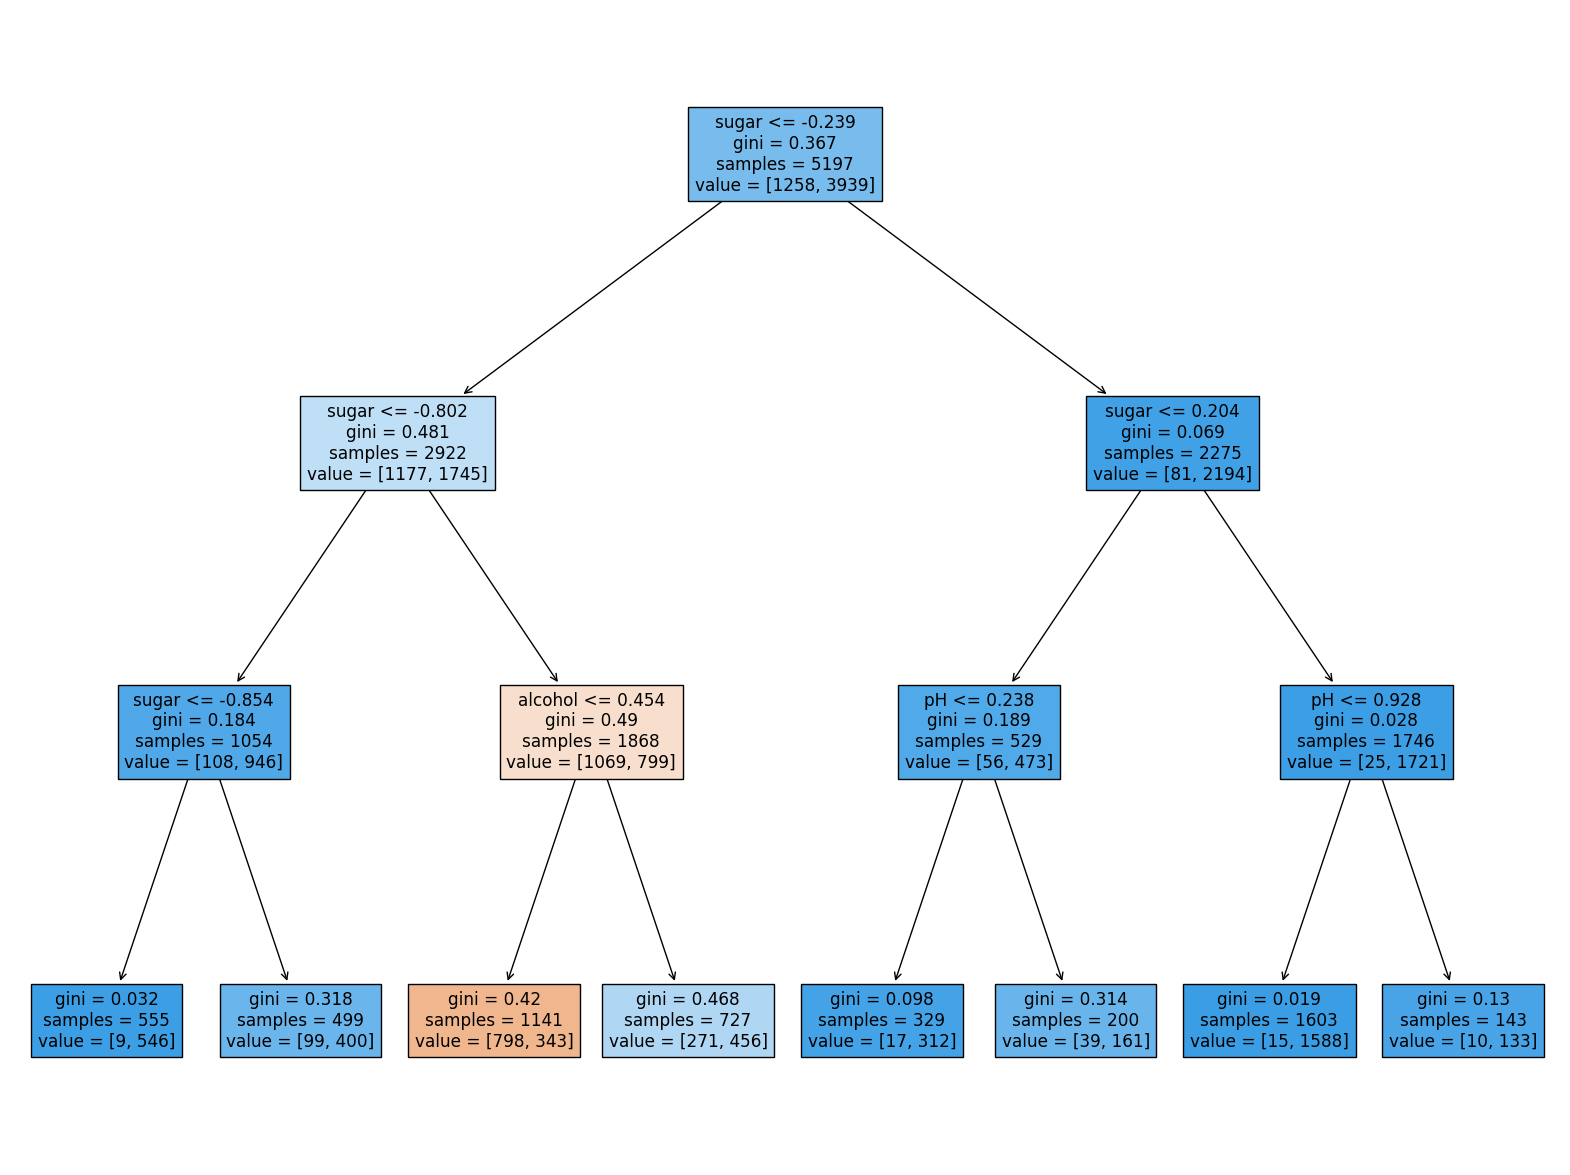

In [103]:
plt.figure(figsize=(20,15))

plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])

plt.show()

In [104]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [105]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [106]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

DecisionTreeClassifier(random_state=42)

In [107]:
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [108]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores) # 디폴트 값이 5라 5개씩 뜸 score_time>>검증하는데 걸린 시간

{'fit_time': array([0.01204252, 0.0152669 , 0.01686954, 0.01586199, 0.01319146]), 'score_time': array([0.00208116, 0.00206208, 0.00099564, 0.00099707, 0.00099659]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [109]:
print(np.mean(scores['test_score']))

0.855300214703487


In [110]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score'])) # 값에 지정 가능

0.855300214703487


In [111]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) #n_splits>>몇번 교차 검증 햘 것인지
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


## 하이퍼파라미터 서치

In [112]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} #과제!!!! : for문 이용해서 범위값 촘촘하게

# 불순도 값이 높을수록 트리가 덜 복잡

In [113]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [114]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [115]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
#5개 중에서 가장 쓸모있는 것을 가져와서 스코어를 매김

0.9615162593804117


In [116]:
print(gs.best_params_) #어떤 파라미터값이 가장 좋은지? >> 0.0001

{'min_impurity_decrease': 0.0001}


In [117]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 과제!!!! : 이거 값 바꿔서 해보기
          'max_depth': range(20, 51), #트리의 최대 깊이
          'min_samples_split': range(2,26), #중간에 있는 것을 몇개로 할 것인가?
          'min_samples_leaf': range(1,26),
          }

In [118]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(20, 51),
                                        'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                                        'min_samples_leaf': range(1, 26),
                                        'min_samples_split': range(2, 26)},
                   random_state=42)

In [119]:
print(rs.best_params_)

{'min_samples_split': 18, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0004, 'max_depth': 39}


In [120]:
print(np.max(rs.cv_results_['mean_test_score'])) #잘 나왔다고 볼 수는 없음

0.8685792552010069


## 과제
Grid Search, Random Search 파라미터 범위 조정(각 방식에 어울리는 범위값. Hint: scipy)

In [121]:
from sklearn.model_selection import GridSearchCV
params={'min_impurity_decrease':[0.001, 0.002, 0.003, 0.004, 0.005]}

In [122]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [123]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.001, 0.002, 0.003, 0.004,
                                                   0.005]})

In [124]:
dt=gs.best_estimator_ 
print(dt.score(train_input, train_target))

0.8724263998460651


In [125]:
print(gs.best_params_) # 최적의 매개변수

{'min_impurity_decrease': 0.001}


In [130]:
from scipy.stats import uniform, randint #uniform은 실수값을 뽑고 randint는 정수값을 뽑음

In [131]:
rgen=randint(0,10) #0에서 10사이의 범위를 가짐
rgen.rvs(10) # 10개의 숫자 샘플링

array([0, 3, 6, 3, 1, 7, 0, 8, 8, 7], dtype=int64)

In [134]:
np.unique(rgen.rvs(1000), return_counts=True) #1000개를 샘플링해봄

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([ 94,  99, 111, 102, 113,  91, 105, 103,  96,  86], dtype=int64))

In [133]:
ugen=uniform(0,1)
ugen.rvs(10) #0~1 사이에서 10개의 실수만 추출해봄

array([0.7113013 , 0.61602918, 0.86672364, 0.1412831 , 0.8834242 ,
       0.67158351, 0.66568049, 0.73509174, 0.95914204, 0.15595933])

샘플링 횟수는 시스템이 허락하는 범위 내에서 최대한 크게 하는게 좋음!!

In [137]:
params={'min_impurity_decrease':uniform(0.0001, 0.001), #0.0001에서 0.001 사이의 실수값을 샘플링 
        'max_depth':randint(20,50), # 20에서 50사이의 정수 샘플링
        'min_samples_split':randint(2,25), #2에서 25사이의 정수 샘플링
        'min_samples_leaf':randint(1,25), #1에서 25사이의 정수 샘플링
        }

In [141]:
from sklearn.model_selection import RandomizedSearchCV
gss=RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                      n_iter=100, n_jobs=-1, random_state=42) #총 100번 샘플링
gss.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000263ADF39690>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000263ADF69090>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000263ADF3A110>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000263ADF3A810>},
                   random_state=42)

In [146]:
print(gss.best_params_) # 최적의 매개변수 조합 출력

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [145]:
dt=gss.best_estimator_
print(dt.score(test_input,test_target))

0.86
